In [1]:
import os
import netCDF4 as nc
import numpy as np
import pandas as pd

import pickle

import copy

import scipy.io as io

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors, colorbar
%matplotlib inline

from skimage import measure
from skimage.filters import gaussian

from impdar import *

from autopicker_methods import *

In [2]:
#files on disk
green_image = '../images/nline5.png'
green_mat = '../data/nline5_migtk_cropped.mat'

#load in data
dat = io.loadmat(green_mat)
data = dat['data']

#original image
mini = -8.774235248565674
maxi = 9.667154026031533

In [3]:
#load in contour data
with open('long_contours_subset', 'rb') as file:
    long_contours_subset = pickle.load(file)
    
with open('uniquex_list', 'rb') as file:
    uniquex_list = pickle.load(file)
    
with open('ridge_points_list', 'rb') as file:
    ridge_points_list = pickle.load(file)
    
with open('top_list', 'rb') as file:
    top_list = pickle.load(file)
    
with open('bottom_list', 'rb') as file:
    bottom_list = pickle.load(file)

In [7]:
#should be 78
print(len(long_contours_subset))
print(len(uniquex_list))
print(len(ridge_points_list))
print(len(top_list))
print(len(bottom_list))

78
78
78
78
78


In [ ]:
# fig, ax = plt.subplots(figsize=(15, 10))

# #plot grid
# p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

# for i, contour in enumerate(long_contours_subset):
#     #plot ridge points
#     ridge = ridge_points_list[i]
#     uniqx = uniquex_list[i]
    
#     c = cm.RdYlBu_r(i/len(long_contours_subset))
        
#     for j, x in enumerate(uniqx):
#         r = ridge[j]
#         ax.scatter(x, r, color=c, marker='o', s=10)
        
# ax.set_ylim(3000, 500)

# fig.colorbar(cm.ScalarMappable(cmap=cm.RdYlBu_r), ax=ax)
    
# plt.show()

#this takes forever, maybe make it a .py script

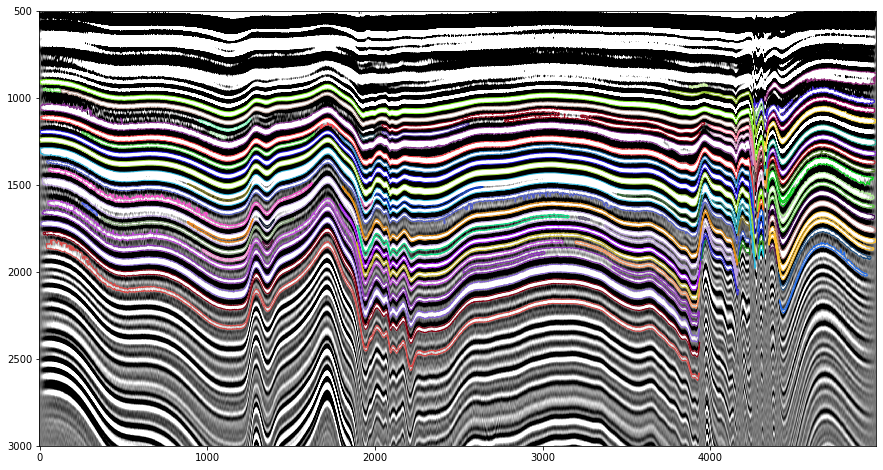

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

for i, contour in enumerate(long_contours_subset):
    plt.plot(contour[:, 1], contour[:, 0], color=np.random.rand(3,), linewidth=1)
    
ax.set_ylim(3000, 500)

plt.show()

### Try to sort these contours here

Since we have the ridges, we should be able to sort them by their starting index. So for each ridge:
- we need to sort by x and y index (bubble sort?)
- https://www.geeksforgeeks.org/bubble-sort/
- https://en.wikipedia.org/wiki/Bubble_sort


- compare starting x points. is it before the previous contour?
- if no, skip
- if yes, is its y point higher? this is in an attempt to push contours closer to the upper left corner first, while pushing those towards the lower right down in the list

# Big flaw?

Ideally, we would also sort contours by last ridge point index. So that contours could be matched up directly. Maybe we should try the bubble sort and see how that goes first.

In [9]:
#first things first: need to print the first x and y coordinates of each of the ridge_points_list items
# there should be 78 total
for i, item in enumerate(ridge_points_list):
    uniquex = uniquex_list[i]
    print(i, uniquex[0], item[0])

0 4325 999
1 4 907
2 3875 936
3 4258 1039
4 23 950
5 131 958
6 4096 995
7 4335 1190
8 4267 1078
9 7 1055
10 4324 1259
11 2041 1156
12 8 1113
13 1024 1155
14 2048 1197
15 4096 1194
16 4324 1399
17 4 1194
18 1024 1198
19 253 1198
20 4096 1236
21 1912 1214
22 4340 1399
23 1794 1220
24 0 1239
25 4341 1438
26 4266 1367
27 3 1296
28 4344 1454
29 4267 1439
30 4342 1531
31 43 1364
32 4269 1510
33 54 1414
34 4325 1485
35 4281 1515
36 4345 1602
37 17 1471
38 4347 1640
39 882 1492
40 1806 1511
41 2048 1572
42 4282 1640
43 4346 1716
44 3445 1551
45 1920 1584
46 50 1601
47 4284 1682
48 4096 1631
49 4346 1783
50 253 1605
51 1789 1613
52 15 1663
53 4284 1761
54 4348 1833
55 2048 1817
56 4224 1719
57 3212 1682
58 371 1689
59 8 1725
60 1310 1689
61 882 1710
62 4285 1826
63 4405 2003
64 22 1779
65 4224 1820
66 1890 1830
67 4096 1973
68 4287 1891
69 42 1854
70 1330 1826
71 3968 1829
72 4224 1875
73 3194 1828
74 4413 2166
75 4354 1880
76 1024 1903
77 4290 1921


In [11]:
#try and define bubble sort here
#will need to keep track of original index so that we can also change the positions of top_list and bottom_list list items
"""
Pass in the list containing all of the ridges that you found from the find_ridge() method.
This method is going to sort that list by x and y coordinates, performing a kind of nested bubble sort.
The goal of this method is to arrange contours such that:
- contours with first (x, y) pairs closest to the upper left corner of the radargram will come first
- contours with first (x, y) pairs closest to the lower right will come last.

Returns a list of ridge lines sorted by first (x, y) pair.
"""
def bubble_sort(ridge_list):
    
    pass

In [ ]:
#now print sorted points
for i, item in enumerate(sorted_ridge_points_list):
    uniquex = uniquex_list[i]
    print(i, uniquex[0], item[0])

### Make a cool visualization!

Make a 2D grid covering the shape of input data[:, 500:3000]. Then plot the starting point for each contour. Then sort, and try to make an animation like in https://en.wikipedia.org/wiki/Bubble_sort#Use